# Dataset Exploration: Baywheels (Part 1/2) 
## by Paul Kojo Dzitse


### Table of Contents
<ul>
<li><a href="#intro"> 1. Introduction</a></li>
<li><a href="#gather1"> 2. Gathering Data </a></li>
<li><a href="#assessing"> 3. Assessing Data</a></li>
<li><a href="#clean"> 4. Cleaning Data</a></li>
<li><a href="#eda"> 5. Exploration Data Analysis (EDA)</a></li>

- Univariate Analysis

- Bivariate Analysis

- Multivariate Analysis
 
 
<li><a href="#conclusion"> 6. Conclusion </a></li>

<li><a href="#Resources"> 7. Resources </a></li>

</ul>

<a id='intro'></a>
## 1. Introduction

### 1.1 Project information

This Capstone project part of the Udacity Data Analysis Nanodegree course. It has two parts that demonstrates the importance and value of data visualization techniques within data analysis process.

I will use Python visualization libraries to systematically wrangle and explore a 2019-baywheels-tripdata datafile in part one of the project. This entails starting from ploting and visaulizing of single variables and building up to ploting and visualizing multiple variables.


In part two of the project, I will produce a short presentation illustrating interesting properties, trends, and relationships that I uncover in the selected (cleaned) dataset. 

### 1.2 Brief Dataset information and important variables

California and on the West Coast of the United States have the first regional and large-scale bicycle sharing system known as the Bay Wheels. It was established as Bay Area Bike Share in August 2013 and from January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.
The system officially re-launched on June 28, 2017 as Ford GoBike in a partnership with Ford Motor Company.

After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. It is expected it will expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

The dataset consists of information on 2.506.983 bike trips, thus including its timing and geolocation of the start and end of each trips. The datasets are recorded months 2019\month_nr-baywheel-tripdata.csv. Each trip is anonymized and includes:
- Trip
- Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


### 1.3 Research questions

### What is the structure of your dataset?


The dataset has 2.506.983 bike trips with 13 columns of the various attributes. The dataset were saved on monthly bases and it was combined in one file for the analysis.

### What is/are the main feature(s) of interest in your dataset?

• What is the pattern of distribution of most trips, with regards to hour of the day or day of the week? How does this reflect among Customers and Subscribers?

• How is the average trip duration distributed? How does this pattern differ within the user_tpye?

• Which bike stations have the most traffics? Can we see differences in distribution amongst Customers and Subscribers?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- start_time
- user_type
- end_station_name
- trip_duration


<a id='gather1'></a>
## 2. Gathering Data

For this analysis, I used the dataset 2019-baywheel-tripdata, which consists of information on 2.506.983 bike trips, thus including its timing and geolocation of the start and end of each trip.It can be found and downloaded [here](https://www.lyft.com/bikes/bay-wheels/system-data).

<a id='assessing'></a>
## 3.  Assesing Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
# Reading in the 12 datasets which cover the 12 months of the year 2019.
files = ['\dataset\201901-baywheels-tripdata.csv',
              '\dataset\201902-baywheels-tripdata.csv',
              '\dataset\201903-baywheels-tripdata.csv',
              '\dataset\201904-baywheels-tripdata.csv',
              '\dataset\201905-baywheels-tripdata.csv',
              '\dataset\201906-baywheels-tripdata.csv',
              '\dataset\201907-baywheels-tripdata.csv',
              '\dataset\201908-baywheels-tripdata.csv',
              '\dataset\201909-baywheels-tripdata.csv',
              '\dataset\201910-baywheels-tripdata.csv',
              '\dataset\201911-baywheels-tripdata.csv',
               '\dataset\201912-baywheels-tripdata.csv']

In [4]:
baywheels = pd.concat([pd.read_csv(f, usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12]) for f in glob.glob("dataset" + "/*.csv")], ignore_index=True)

In [5]:
# high-level overview of data shape and composition
print(baywheels.shape)
print(baywheels.dtypes)

(2506983, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object


In [6]:
# checking if there is any duplicated data entry
sum(baywheels.duplicated())

0

In [7]:
# high-level overview of data shape and composition
print(baywheels.shape)
print(baywheels.dtypes)

(2506983, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object


In [8]:
baywheels.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer
5,6733,2019-01-31 22:35:50.8130,2019-02-01 00:28:04.5120,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,3532,Subscriber
6,1188,2019-01-31 23:54:38.9010,2019-02-01 00:14:27.9000,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,146.0,30th St at San Jose Ave,37.742314,-122.423180,5114,Subscriber
7,1254,2019-01-31 23:48:50.0920,2019-02-01 00:09:44.4970,318.0,San Carlos St at Market St,37.330698,-121.888979,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,3967,Subscriber
8,3153,2019-01-31 23:17:05.4620,2019-02-01 00:09:39.4570,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,70.0,Central Ave at Fell St,37.773311,-122.444293,4813,Subscriber
9,323,2019-01-31 23:59:47.5680,2019-02-01 00:05:11.1770,223.0,16th St Mission BART Station 2,37.764765,-122.420091,129.0,Harrison St at 20th St,37.758862,-122.412544,1976,Subscriber


In [9]:
baywheels.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           80734
start_station_name         80133
start_station_latitude         0
start_station_longitude        0
end_station_id             82902
end_station_name           82350
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

In [10]:
# start_time has the wrong dataformat:
type(baywheels['start_time'][0])

str

In [11]:
type(baywheels['end_time'][0])

str

In [12]:
type(baywheels['start_station_name'][0])

str

In [13]:
# no duplicates
baywheels.duplicated().sum()

0

In [14]:
type(baywheels['user_type'][0])

str

<a id='clean'></a>
## 4. Cleaning Data

So we have seen that we have some quality issues in the dataset that needs to be cleaned. We will thus do it in the upcoming analysis.

### Summary - Quality and Tidiness issues

#### Quality Issues

- 1.  start_time and end_time have wrong datatype. They should be datetime variables
- 2.  user_type should be categorical variable instead of string 



Let us begin by first making a copy of our dataset

In [15]:
# first make copy of dataframes before cleaning
baywheels_clean = baywheels.copy()

#### issue 1.: start_time and end_time have wrong datatype

### Define:

convert start_time and end_time to datetime variable via pd.to_datetime()

### code:

In [16]:
baywheels_clean['start_time'] = pd.to_datetime(baywheels_clean['start_time'])
baywheels_clean['end_time'] = pd.to_datetime(baywheels_clean['end_time'])

### test:

In [17]:
type(baywheels_clean['start_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(3)
memory usage: 248.6+ MB


#### issue 2.: user_type has wrong variable. It should be categorical 

### define: 

convert user_type to categorical variable via .astpye('category')

In [19]:
baywheels_clean['user_type'] = baywheels_clean['user_type'].astype('category')


### test:

In [20]:
baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
dtypes: category(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 231.9+ MB


In [21]:
#convert duration in seconds to minutes
baywheels_clean['duration_min'] = baywheels_clean['duration_sec']/60

Now we extract day, week and month for start_time

In [22]:
# extract day,week,month from the start_time
baywheels_clean['start_date'] = baywheels_clean.start_time.dt.strftime('%Y-%m-%d')
baywheels_clean['start_hour_of_day'] = baywheels_clean.start_time.dt.strftime('%H')
baywheels_clean['start_day_of_week'] = baywheels_clean.start_time.dt.strftime('%A')
baywheels_clean['start_month'] = baywheels_clean.start_time.dt.strftime('%b')
baywheels_clean['year_month'] = baywheels_clean['start_time'].dt.to_period('M')

In [23]:
#distplay number of trips within the week
baywheels_clean['start_day_of_week'].value_counts()

Tuesday      427640
Thursday     424474
Wednesday    414448
Friday       397284
Monday       396463
Saturday     234370
Sunday       212304
Name: start_day_of_week, dtype: int64

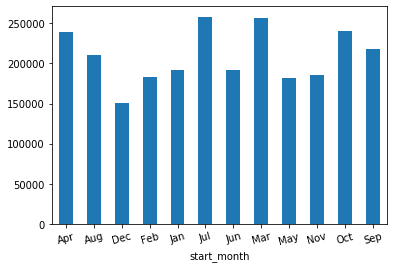

In [24]:
baywheels_clean.groupby(['start_month']) ['start_month'].count().plot(kind='bar');
plt.xticks(rotation=15);

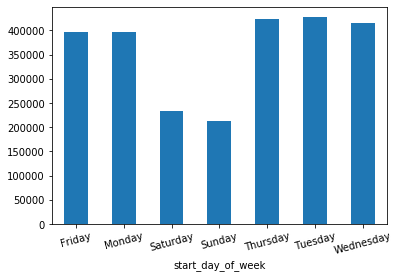

In [25]:
baywheels_clean.groupby(['start_day_of_week']) ['start_day_of_week'].count().plot(kind='bar');
plt.xticks(rotation=15);

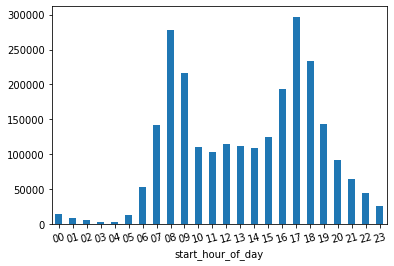

In [26]:
#display trip along the hours
baywheels_clean.groupby(['start_hour_of_day']) ['start_hour_of_day'].count().plot(kind='bar');
plt.xticks(rotation=15);

In [27]:
baywheels_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  duration_min             float64       
 14  start_date               object        
 15  start_hour_of_day        object        
 16  start_day_of_week        object        
 17  start_month              ob

Store the clean dataset

So the new variables are:

- duration_min: duration of bike trip expressed  in minutes
- start_date: date in which bike trip occurred
- start_hour_of_day: hour in which a bike trip started
- start_day_of_week: day of week a bike trip started
- start_month: month in which a bike trip of started


<a id='eda'></a>
## 5. Exploration Data Analysis (EDA)

Now we will begin our exploration analysis with plots of single variables (univariate exploration) and move onto to building up for plots of bivariate exploration and then finally to multiple variables.

## 5.1 Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [28]:
#display the start min and max start times
baywheels_clean.start_time.min(),baywheels_clean.start_time.max()

(Timestamp('2019-01-01 00:07:10.576000'), Timestamp('2019-12-31 23:59:41'))

In [29]:
baywheels_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,duration_min
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04,1.346081e+01
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05,3.291190e+01
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00,1.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03,5.983333e+00
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03,9.516667e+00
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03,1.478333e+01
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05,1.520183e+04


Let us now look at the distribution of bike trip

In [30]:
baywheels_clean.duration_min.max()

15201.833333333334

In [31]:
baywheels_clean.duration_min.median()

9.516666666666667

In [32]:
baywheels_clean.duration_min.mode()

0    5.65
dtype: float64

Let us plot the histogram to determine the distribution of trip duration.

Text(0.5, 1.0, 'Distribution of duration of bike trip ')

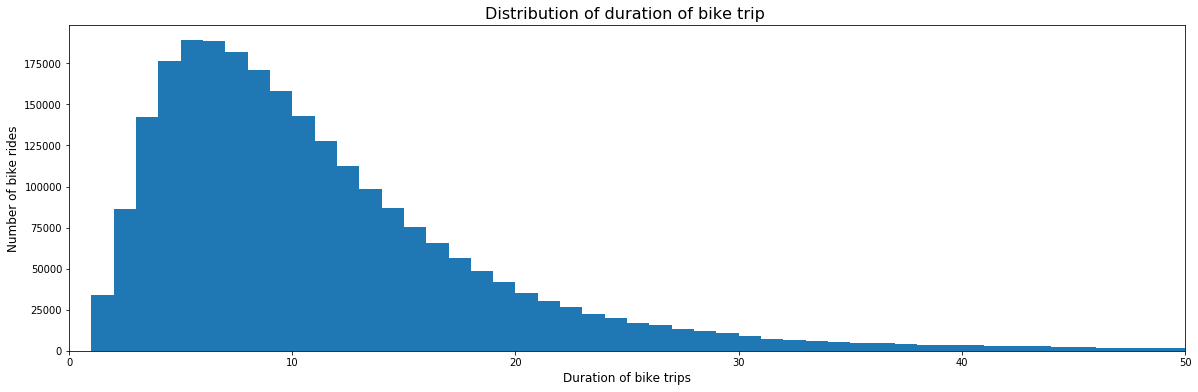

In [33]:
graph = baywheels_clean.duration_min
bins = np.arange(0, baywheels_clean.duration_min.max(0)+1, 1)
plt.figure(figsize=(20,6))
plt.hist(data=baywheels_clean, x='duration_min', bins=bins)
plt.xlim((0,50))
plt.ylabel('Number of bike rides', fontsize=12)
plt.xlabel('Duration of bike trips', fontsize=12);
plt.title('Distribution of duration of bike trip ', fontsize=16)


- As we can see from ploting the duration in minutes, the distribution is skewed to the right. In addtion we have outliers. In order to remove reduce the influence of outliers, we will control it with values beyond 5 standard deviations based on calculated Z-score. 

In [34]:
#  calulating the Z-score baseon 5 standard deviations
quartiles = np.percentile(baywheels_clean['duration_min'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sig


6.5120000000000005

In [35]:
baywheels_new = baywheels_clean.query('(duration_min > @mu - 5 * @sig) & (duration_min < @mu + 5 * @sig)')

In [36]:
baywheels_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month,year_month
6,1188,2019-01-31 23:54:38.901,2019-02-01 00:14:27.900,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,146.0,30th St at San Jose Ave,37.742314,-122.423180,5114,Subscriber,19.800000,2019-01-31,23,Thursday,Jan,2019-01
7,1254,2019-01-31 23:48:50.092,2019-02-01 00:09:44.497,318.0,San Carlos St at Market St,37.330698,-121.888979,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,3967,Subscriber,20.900000,2019-01-31,23,Thursday,Jan,2019-01
9,323,2019-01-31 23:59:47.568,2019-02-01 00:05:11.177,223.0,16th St Mission BART Station 2,37.764765,-122.420091,129.0,Harrison St at 20th St,37.758862,-122.412544,1976,Subscriber,5.383333,2019-01-31,23,Thursday,Jan,2019-01
10,2316,2019-01-31 23:25:59.866,2019-02-01 00:04:36.064,378.0,Empire St at 7th St,37.347745,-121.890800,292.0,Empire St at 1st St,37.344882,-121.896966,3826,Subscriber,38.600000,2019-01-31,23,Thursday,Jan,2019-01
11,433,2019-01-31 23:57:04.381,2019-02-01 00:04:17.489,266.0,Parker St at Fulton St,37.862464,-122.264791,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,4642,Subscriber,7.216667,2019-01-31,23,Thursday,Jan,2019-01


In [37]:
# maximium duration in the selected dataset
baywheels_new.duration_min.max()

42.06666666666667

In [38]:
baywheels_clean.shape[0], baywheels_new.shape[0], baywheels_clean.shape[0] - baywheels_new.shape[0]

(2506983, 2450155, 56828)

Let us plot the distribution of our newly selected dataset

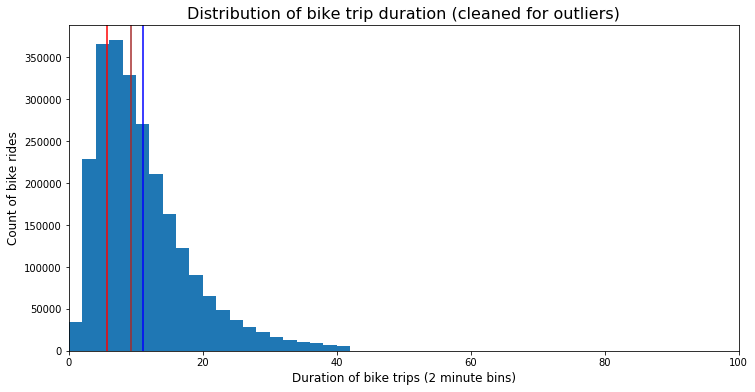

In [39]:
graph = baywheels_new.duration_min
bins = np.arange(0, baywheels_new.duration_min.max(0)+1, 2)
plt.figure(figsize=(12,6))
plt.hist(data=baywheels_new, x='duration_min', bins=bins)
plt.xlim((0,100))

plt.ylabel('Count of bike rides', fontsize=12)
plt.xlabel('Duration of bike trips (2 minute bins)', fontsize=12);
plt.title('Distribution of bike trip duration (cleaned for outliers)', fontsize=16);

import statistics
plt.axvline(statistics.mean(graph),color='blue');
plt.axvline(statistics.mode(graph),color='red');
plt.axvline(statistics.median(graph),color='brown');


We see that even after the removing outliers the distribution of bike trip is still right-skewed. 

#### Distribution of trip duration in terms Of MONTH, DAY_OF_WEEK AND HOUR LEVEL


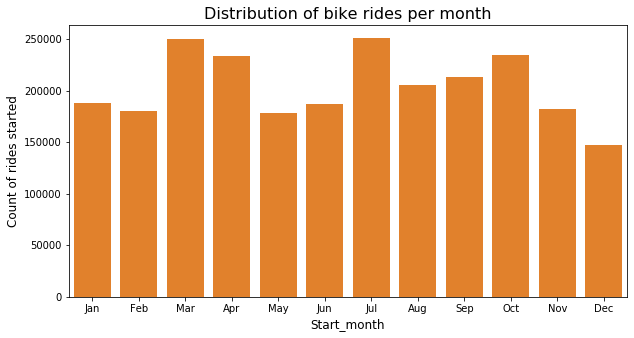

In [40]:
plt.figure(figsize=(10,5))
base_color = sb.color_palette()[1]

months_list = ['Jan','Feb','Mar', 'Apr','May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthcat = pd.api.types.CategoricalDtype(ordered=False, categories=months_list)
baywheels_new['start_month'] = baywheels_new['start_month'].astype(monthcat)

sb.countplot(data=baywheels_new, x='start_month', color=base_color)
plt.xlabel('Start_month', fontsize=12)
plt.ylabel('Count of rides started', fontsize=12)
plt.title('Distribution of bike rides per month', fontsize=16);


Let observe the sorted distribution in terms of highest values within the month

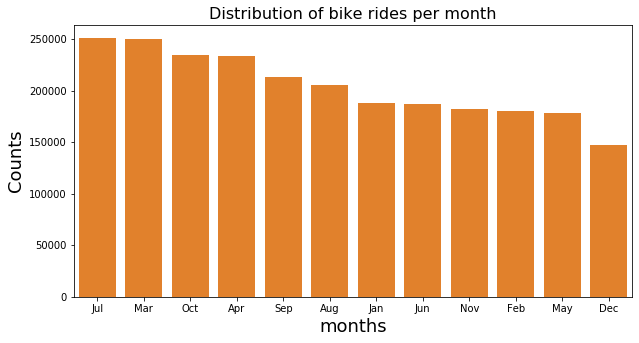

In [41]:
plt.figure(figsize = (10,5))
base_color = sb.color_palette()[1]
sb.countplot(baywheels_new['start_month'],order = baywheels_new['start_month'].value_counts().index, color=base_color);
plt.xlabel('months', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);
plt.title("Distribution of bike rides per month", fontsize = 16);

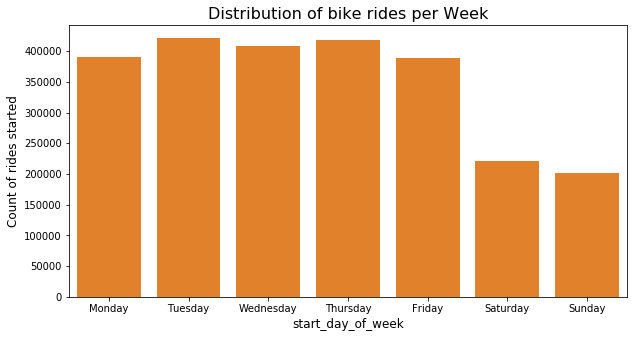

In [42]:
plt.figure(figsize=(10,5))
base_color = sb.color_palette()[1]

week_list = ['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
weekcat = pd.api.types.CategoricalDtype(ordered=False, categories=week_list)
baywheels_new['start_day_of_week'] = baywheels_new['start_day_of_week'].astype(weekcat)

sb.countplot(data=baywheels_new, x='start_day_of_week', color=base_color)
plt.xlabel('start_day_of_week', fontsize=12)
plt.ylabel('Count of rides started', fontsize=12)
plt.title('Distribution of bike rides per Week', fontsize=16);


Let us sort the months according to trips count 

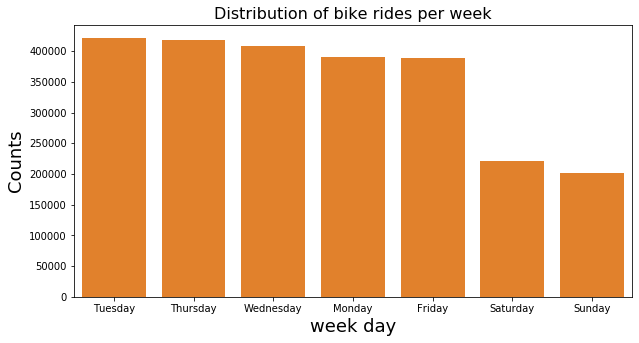

In [43]:
plt.figure(figsize = (10,5))
base_color = sb.color_palette()[1]
sb.countplot(baywheels_new['start_day_of_week'],order = baywheels_new['start_day_of_week'].value_counts().index, color=base_color);
plt.xlabel('week day', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);
plt.title("Distribution of bike rides per week", fontsize = 16);

Next, let us we ascertain the distribution of per hourly start

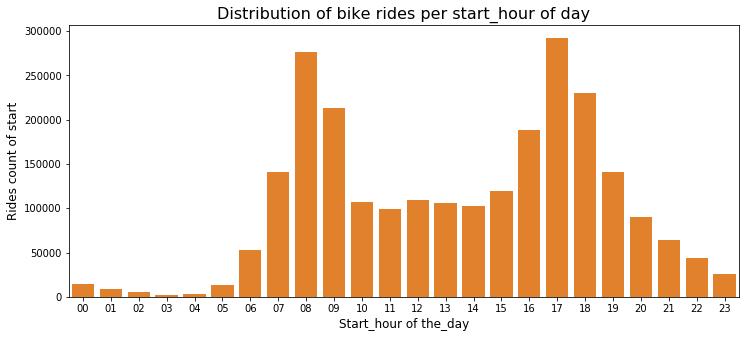

In [44]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[1]
sb.countplot(data=baywheels_new, x='start_hour_of_day', color=base_color)
plt.xlabel('Start_hour of the_day', fontsize=12)
plt.ylabel('Rides count of start', fontsize=12)
plt.title('Distribution of bike rides per start_hour of day', fontsize=16);


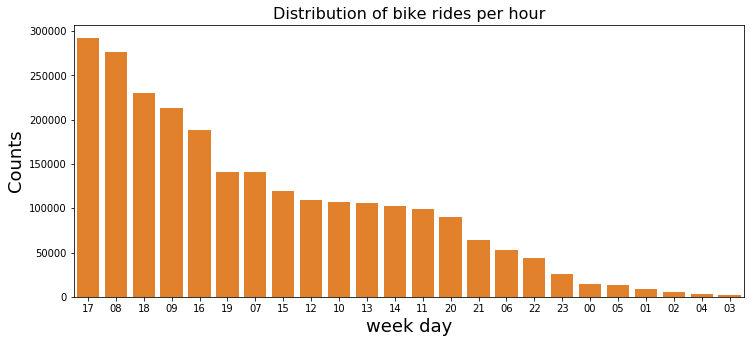

In [45]:
plt.figure(figsize = (12,5))
base_color = sb.color_palette()[1]
sb.countplot(baywheels_new['start_hour_of_day'],order = baywheels_new['start_hour_of_day'].value_counts().index, color=base_color);
plt.xlabel('start_hour of the_day', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);
plt.title("Distribution of bike rides per hour", fontsize = 16);

First of all from the above distribution, we see that the distribution of start bike trip is bimodal

- As we can see that busiest hour is 17 hrs GMT. This is followed by 08.00 in the morning. In the mornings there is heavy traffic of bike trips form 7-9 AM in morning and between 16-18 GMT in the evening. This are usual commuting time.

- We see clearly huge number of bike trips during the peak hours when people go to school or work or they return from it to home. This is understandable since at weekends less people go to work or study as they do during the workweek.

- The extent to which bike trip distribution differs on weekdays and the weekends might be interesting to determine.


#### We will now examine the distribution of user_type (Customers and Subscribers)

In [46]:
baywheels_new.user_type.value_counts()

Subscriber    2000681
Customer       449474
Name: user_type, dtype: int64

In [47]:
baywheels_new.user_type.value_counts()/ baywheels_new.shape[0]

Subscriber    0.816553
Customer      0.183447
Name: user_type, dtype: float64

As we see from the data we have over 82% of the user_type as subscribers and 18% customers. We now depict this distribution with a pie chart as relative freqencies and and in a bar chart

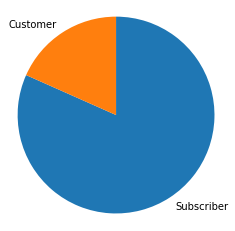

In [48]:
counts_sorted = baywheels_new['user_type'].value_counts()
plt.pie(counts_sorted, labels = counts_sorted.index, startangle = 90, counterclock = False);
plt.axis('square'); # distribution via pie chart



And plotting this with this we obtain visualization below

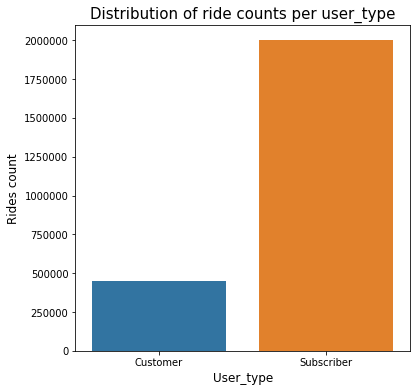

In [49]:
plt.figure(figsize=(6,6))
sb.countplot(data=baywheels_new, x='user_type')
plt.xlabel('User_type', fontsize=12)
plt.ylabel('Rides count', fontsize=12)
plt.title('Distribution of ride counts per user_type', fontsize=15);


Let us determine the 10 most popular destinations

In [50]:
# top 10 destinations:
popular_destinations = baywheels_new['end_station_name'].value_counts().index[:10]

In [51]:
# here we create dataframe with trips only to top 10 destinations
popular_destinations_df = baywheels_new.loc[baywheels_new['end_station_name'].isin(popular_destinations)]
popular_destinations_df.sample(5)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month,year_month
1452171,2123,2019-07-28 22:59:23.000,2019-07-28 23:34:46.000,NaN,NaN,37.775928,-122.392905,81.0,Berry St at 4th St,37.775880,-122.393170,738195,Subscriber,35.383333,2019-07-28,22,Sunday,Jul,2019-07
1983489,790,2019-10-24 19:51:48.479,2019-10-24 20:04:59.146,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,10366,Customer,13.166667,2019-10-24,19,Thursday,Oct,2019-10
1356171,322,2019-07-11 14:46:00.463,2019-07-11 14:51:22.790,89.0,Division St at Potrero Ave,37.769218,-122.407646,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2948,Subscriber,5.366667,2019-07-11,14,Thursday,Jul,2019-07
638832,583,2019-04-30 07:37:21.045,2019-04-30 07:47:04.065,126.0,Esprit Park,37.761634,-122.390648,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3226,Subscriber,9.716667,2019-04-30,07,Tuesday,Apr,2019-04
1430237,826,2019-07-25 12:18:04.000,2019-07-25 12:31:50.000,NaN,NaN,37.752396,-122.414440,81.0,Berry St at 4th St,37.775880,-122.393170,773150,Subscriber,13.766667,2019-07-25,12,Thursday,Jul,2019-07


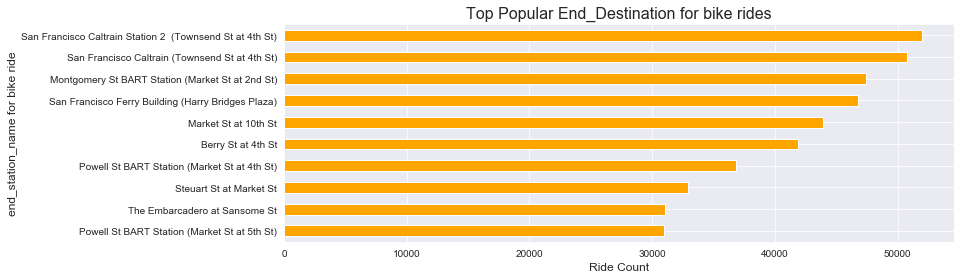

In [52]:
plt.figure(figsize=(12,4))
sb.set_style('darkgrid')
popular_destinations_df['end_station_name'].value_counts().sort_values(ascending=True).plot(kind='barh', color='orange');
plt.title('Top Popular End_Destination for bike rides', fontsize=16)
plt.xlabel('Ride Count', fontsize=12)
plt.ylabel('end_station_name for bike ride', fontsize=12);


#### Let us determin how the rest of the dataset (Outliers) is distributed

In [53]:

# Let's have a look at the outliers in duration_min
outliers_group = baywheels_clean.query('duration_min >= 42.06666666666667 ')

In [54]:
#outliers_group = baywheels_outlier_group.query('duration_min >= 42.06666666666667 ')
outliers_group.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month,year_month
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1347.083333,2019-01-31,17,Thursday,Jan,2019-01
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1098.333333,2019-01-31,20,Thursday,Jan,2019-01
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1043.883333,2019-01-31,18,Thursday,Jan,2019-01
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,744.666667,2019-01-31,19,Thursday,Jan,2019-01
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,1011.816667,2019-01-31,14,Thursday,Jan,2019-01


Let us explore the distribtion with the day of the week

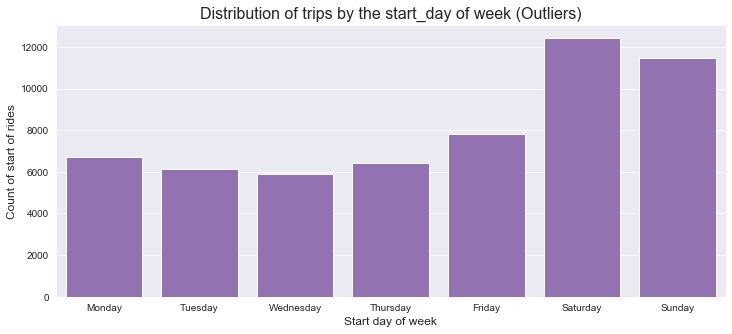

In [55]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[4]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
outliers_group['start_day_of_week'] = outliers_group ['start_day_of_week'].astype(weekdaycat)
sb.countplot(data=outliers_group, x='start_day_of_week', color=base_color)
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Count of start of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week (Outliers)", fontsize=16);



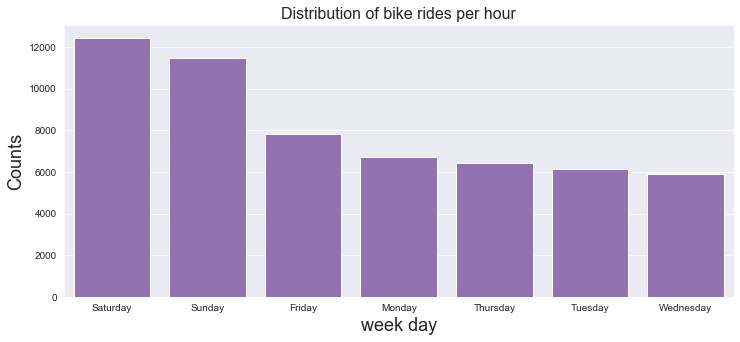

In [56]:
plt.figure(figsize = (12,5))
base_color = sb.color_palette()[4]
sb.countplot(outliers_group['start_day_of_week'],order = outliers_group['start_day_of_week'].value_counts().index, color=base_color);
plt.xlabel('week day', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);
plt.title("Distribution of bike rides per hour", fontsize = 16);

Let us determine the hourly start distribution

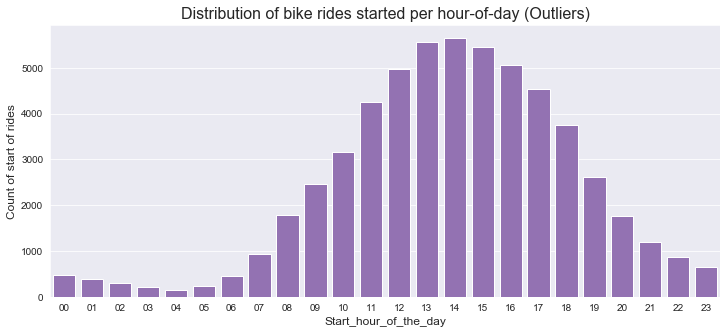

In [57]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[4]
sb.countplot(data= outliers_group, x='start_hour_of_day', color=base_color)
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('Count of start of rides', fontsize=12)
plt.title('Distribution of bike rides started per hour-of-day (Outliers)', fontsize=16);


- We have a unimodal distribution, with the busiest hour being 14 hrs GMT and having the busy hours between 11:00 and 18:00 GMT. Surprising it does seem that this group do not use bike for commuting to work. This result differs from earlier our observation, where the highest rides occurs between 7:00-9:00 and 16:00 to 18:00 on weekdays. They however turn to be more active at the weekends, with Saturday recording their highest bike ride. This is then followed by Sunday. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The distribution of number of bike trips has generally remain relative constant over the year 2019 with the peak seasons being months March and July recording over 250.000 bike trips. 

- Inaddition we noticed that during weekdays the number of trips is somewhat the double of that of the weekend.

- Furthermore, we noticed that the distribution of starting a bike trip is bimodal, with most trips starting between 8-9 or between 17-18 hours GMT



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Several variables were converted to correct datatype (start_time, end_time, and user_type). Additional variables (start_date, start_hour, start_day_of_week, start_month, start_week) were also created so as to create plots with different time resolutions.

- As the bike trip duration had outliers of more than 12 hours up to 24 hours (15202 minutes) and to avoid having biased results in our exploration, these outliers were removed via sigma-clipping operation and thus we used trips duration lasting to at most <= 42 minutes for the analysis. For our exploration analysis 2.450.155 bike trips were used. 

- In a furtherance, we looked into the outlier group and found out their distribution was unimodal, as against the bimodal we obtained from our selected sample by using clipping operation and most bike traffic occurred at the weekends. This result might seem that this group do not use bikes for commuting to work or school.


- Interesting will be to find out how the distribution of bike trips varies between Customers and Subscribers on weekdays and at the weekend. It may as be of interest to find out how the distribution of bike rides differs over the day between them as well. It may well be that Customers might have different bike trip distribution that differs from bimodal one as they are not bound to office hours.


## 5.2 Bivariate Exploration

> Now let us investigate relationships between pairs of variables in your
data. 


### Relationship between duration_min of bike trips and user_type

Let us determine the relationship between the duration_min of bike trips and user_type by using barplot, boxplot and a violineplot

Text(0.5, 1.0, 'boxplot')

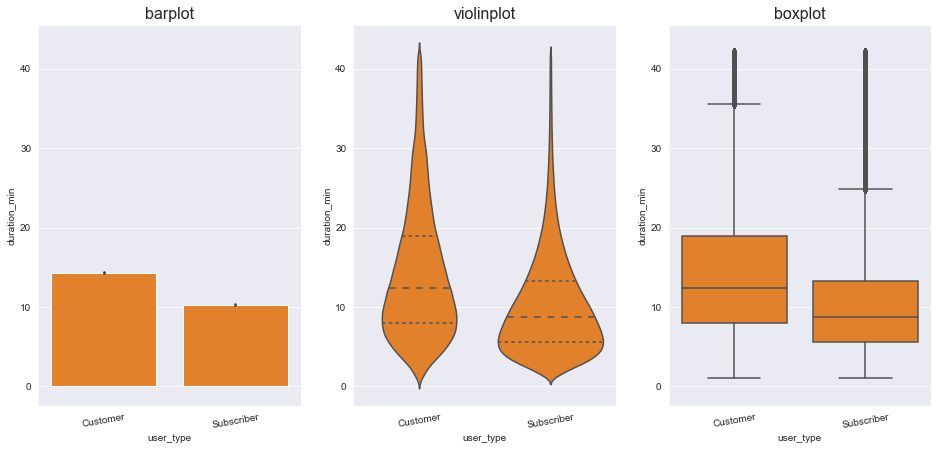

In [58]:
plt.figure(figsize = [16,7])
base_color = sb.color_palette()[1]
# mid plot: violinplot
plt.subplot(1, 3, 2)
ax1 = sb.violinplot(data = baywheels_new, x = 'user_type', y = 'duration_min', inner='quartile', color=base_color)
plt.xticks(rotation = 10)   
plt.title('violinplot', fontsize=16)         


plt.subplot(1, 3, 1)
sb.barplot(data = baywheels_new, x = 'user_type', y = 'duration_min', color=base_color)
plt.xticks(rotation = 10) 
plt.ylim(ax1.get_ylim())
plt.title('barplot', fontsize=16)  

plt.subplot(1, 3, 3)
sb.boxplot(data = baywheels_new, x = 'user_type', y = 'duration_min', color=base_color)
plt.xticks(rotation = 10) 
plt.ylim(ax1.get_ylim())
plt.title('boxplot', fontsize=16)         




- Firstly the barplot indicates that Customers have on average 5 minutes more bike trips duration than Subscribers. 

- Furthermore, that violinplot shows that the third quartile of the Subscribers is just a little above the median of the Customers distribution. In addition, the boxplot indicates that both user_types have outlier points that are more than 1.5 times the IQR above the third quartile. These are represented by the higher whiskers.

Note: Violin plots depicts distribution as density curves, while boxplot use summary approach, by plotting the quantiles as boxes with Whiskers.  The central line in the box indicates the median of the distribution, with the top and bottom lines representing the third and first quartiles of the data accordingly. Thus, the height of the box is the interquartile range (IQR). The minimum and maximum value of the distribution are represented by the two extreme points, with the lower being the minimum and the highest being the maximum. Generally, a maximum range is set on whisker length; with a default of 1.5 times the IQR. The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot.

#### Let use determine how user_tpes variable is distributed over the hour_of_day, day_of_week and months of the year.

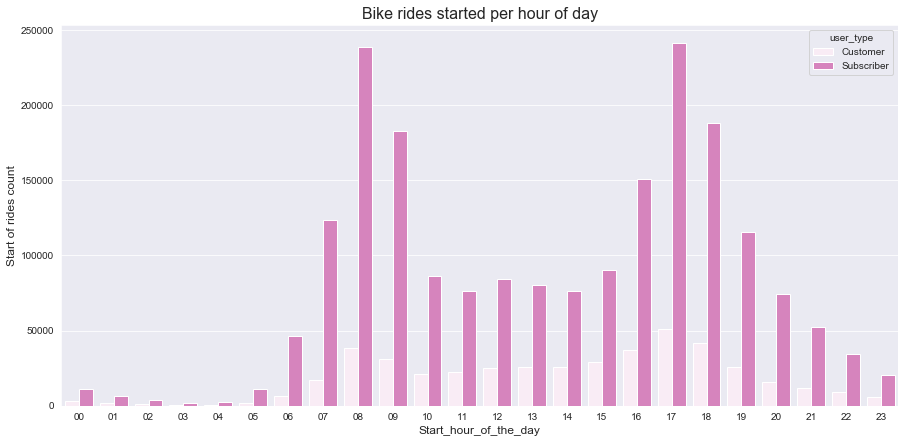

In [59]:
plt.figure(figsize=(15,7))
base_color = sb.color_palette()[6]
sb.countplot(data=baywheels_new, x='start_hour_of_day', hue='user_type', color=base_color)
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('Start of rides count', fontsize=12)
plt.title('Bike rides started per hour of day', fontsize=16);


- From the graph we observe that the distribution of start bike trips on hourly bases is the same for both user groups, with the Customers having a much more stability from 08:00 to 19:00. Subscribers are more busy between 7:00 to 9:00 and 16:19 hrs 

Let us determine the distribution interms of days of the week

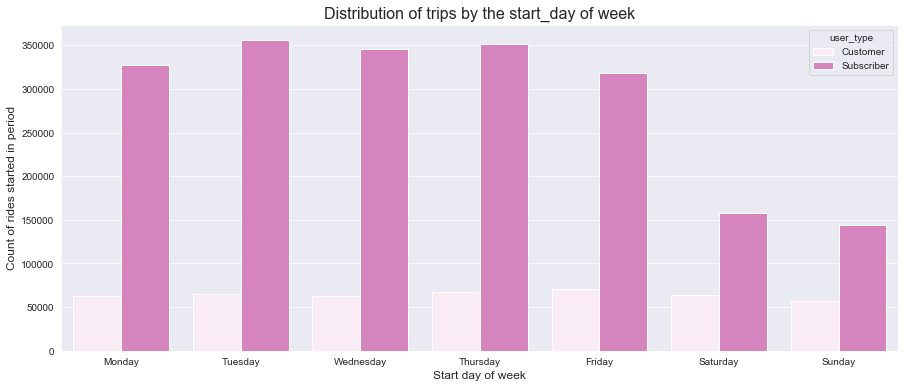

In [60]:
plt.figure(figsize=(15,6))
base_color = sb.color_palette()[6]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
baywheels_new['start_day_of_week'] = baywheels_new['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=baywheels_new, x='start_day_of_week', hue='user_type', color=base_color)
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Count of rides started in period', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);

- The plot of the selected dataset with user_types and start days of the week by using a barplot reveals that distribution of bike trips for Customers is somewhat constant throughout the week and it irrespective of the day in the week. However, we observe that for Subscribers most of the activities take place within the weekday, and falling to almost half at the weekends. It is most likely this category of user are people who have to commute to work to school. It will be interesting to see how the category (user_type) and day of week map in the multivariate analysis.

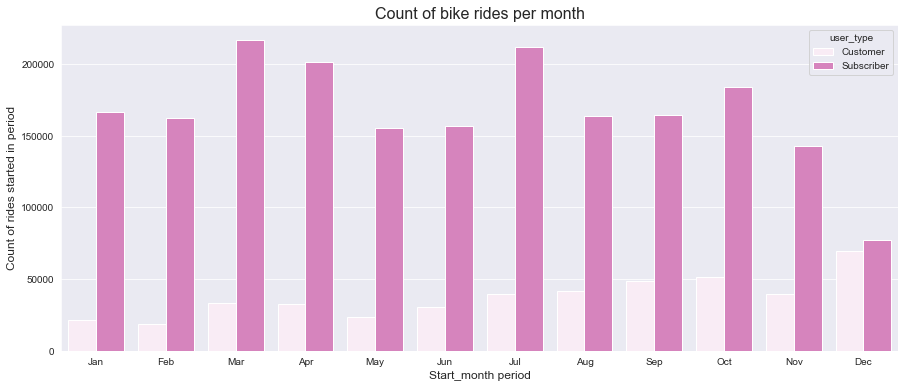

In [61]:
plt.figure(figsize=(15,6))
base_color = sb.color_palette()[6]
months_list = ['Jan','Feb','Mar', 'Apr','May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=months_list)
baywheels_new['start_month'] = baywheels_new['start_month'].astype(monthcat)

sb.countplot(data=baywheels_new, x='start_month', hue='user_type', color=base_color)
plt.xlabel('Start_month period', fontsize=12)
plt.ylabel('Count of rides started in period', fontsize=12)
plt.title('Count of bike rides per month', fontsize=16);

- As we can see from the graph above, Subscribers had highest traffic in May, June and July and to same extend in October. In December, the Subscribers recorded the lowest traffic. This is direct opposite to that of the Customers. The highest traffic is in December. 

#### Let us determine distribution of the 10 most popular end stations

In [62]:
# determine index-object to be able to be present the faceted grid in descending order of success of destination
make_means = popular_destinations_df.groupby('end_station_name').count()
comb_order = make_means.sort_values('duration_min', ascending = False).index

<Figure size 576x504 with 0 Axes>

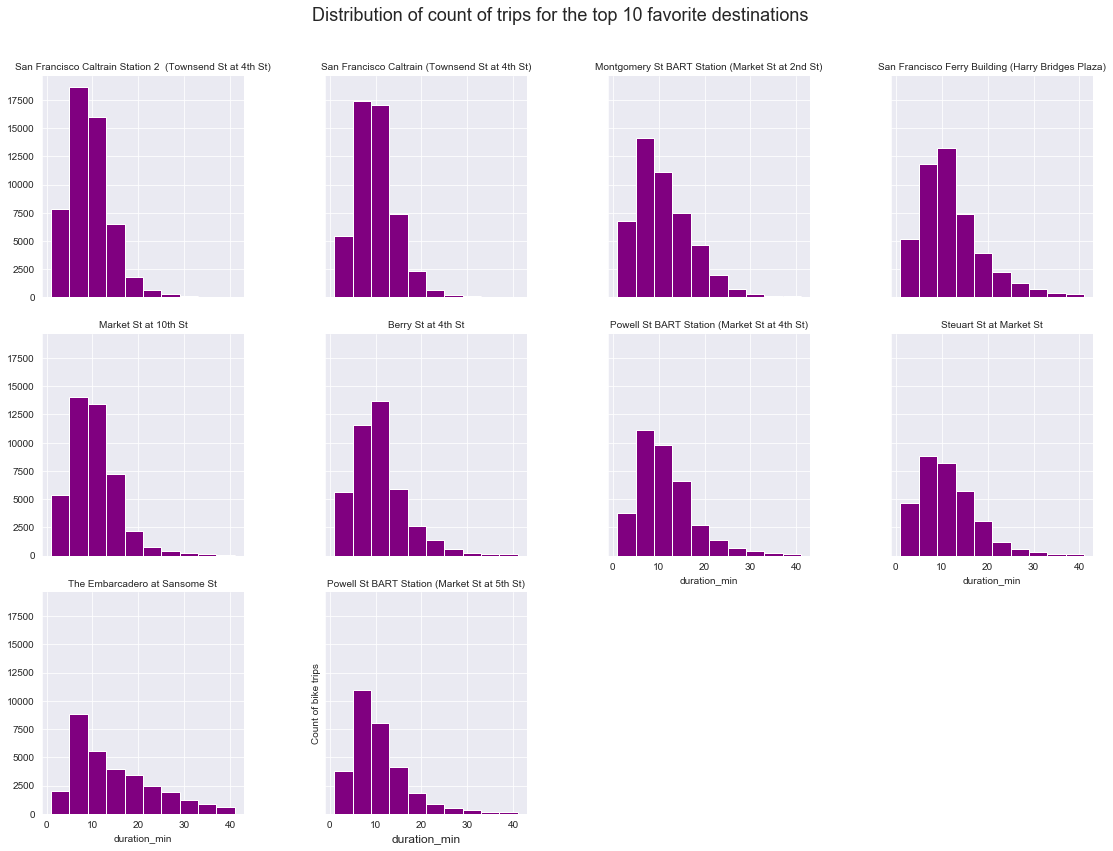

In [63]:
# plotting of distribution of count of trips to favorite destination
plt.figure(figsize=(8,7))
g = sb.FacetGrid(data = popular_destinations_df, col = 'end_station_name', col_wrap = 4, height = 4, col_order = comb_order, sharey=True)

g.map(plt.hist, 'duration_min', bins = np.arange(baywheels_new['duration_min'].min(), baywheels_new['duration_min'].max()+1, 4), color='purple')
plt.ylabel('Count of bike trips')
plt.xlabel('duration_min', fontsize=12)
g.set_titles('{col_name}');

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of count of trips for the top 10 favorite destinations', fontsize=18);


- The plot of the full data based on data on the 10 most popular destination and values of the trip duration by using FacetGrid informs that there is not so much difference in trip duration of the top 10 destinations. Interestingly they all turn to have a right skewed distribution. Nevertheless, the destination of Embarcadero at Sansome St seems to have relatively long trip duration as represented by its largest tail to the right.

- On the other hand, San Francisco Calltrain  Station 2 (Townsend St at 4th St ) and San Francisco Caltrain (Townsend St at 4th St) turn to have relatively shorter trip durations.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- We have observe that Customers have on average 5 minutes more bike trips duration than Subscribers. This is reflected in both the violinplot and barplot. 

- The distribution of bike trips for Customers is almost constant throughout the week. Subscribers turn to hire bikes more on weekdays 

- Customers hiring of bikes is constant throughout the week (weeksdays as well as weekends), while Subscribers turn mainly to hire bikes on weekdays. 

- The trip distribution in terms of hours for both Customers and Subscribers turn to follow a similar trend ranging form 07:00 to 09:00 and 16:00to 19:00 hrs.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- We have noticed that there is not so much difference in trip duration of the top 10 destinations. They turn to have a right skewed distribution. Interesting it can be seen that the destination of Embarcadero at Sansome St seems to have relatively longer trip durations as represented by its largest tail to the right.

- While destination to San Francisco Calltrain  Station 2 (Townsend St at 4th St ) and San Francisco Caltrain (Townsend St at 4th St) turn to have the relatively shorter trip duration.

- There seems to be an interesting relationship between the time taken to complete a trip and the starting hour.  Most probabily, the traffic situation might turn to have some influence.

- It might be interesting to explore the relationship between trip duration, user_type and station_name


## 5.3 Multivariate Exploration

#### Let us continue to create plots of three or more variables to investigate our dataset further.

Here are some of the combinations we shall be exploring:

- user_type, start_month and trip duration in minutes (duration_min)
- user_type, start_day_of_week and trip duration in minutes
- user_type, start_hour_of_day and trip duration in minutes
- To what extend does hourly used varies between Customers and Subscribers
- To what extend does the hourly bike usage varies during a week between Customers and Subscribers
- How does the trip duration relate over the top ten destination and start day of the week

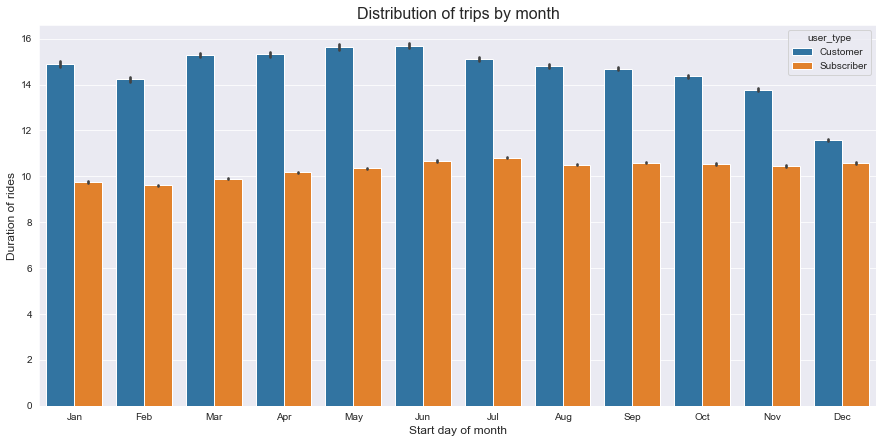

In [64]:
plt.figure(figsize=(15,7))
base_color = sb.color_palette()[2]

months_list = ['Jan','Feb','Mar', 'Apr','May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=months_list)
baywheels_new['start_month'] = baywheels_new['start_month'].astype(monthcat)

sb.barplot(data=baywheels_new, x='start_month', y='duration_min', hue='user_type');

plt.xlabel('Start day of month', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by month", fontsize=16);


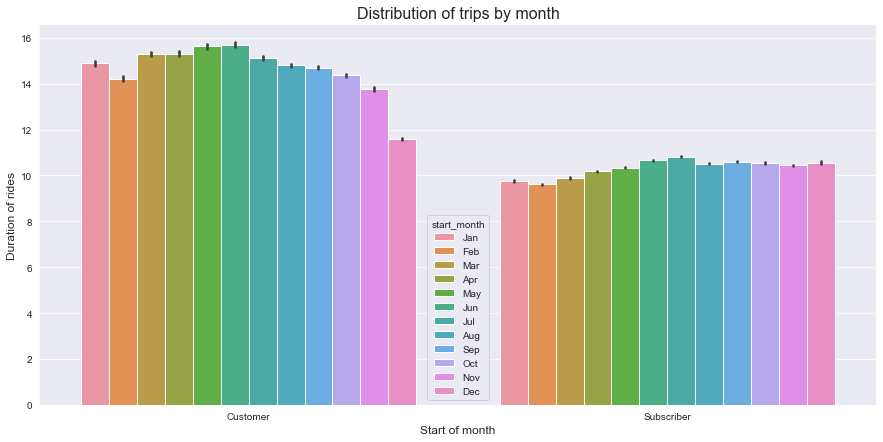

In [65]:
plt.figure(figsize=(15,7))
base_color = sb.color_palette()[2]

#months_list = ['Jan','Feb','Mar', 'Apr','May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=months_list)
baywheels_new['start_month'] = baywheels_new['start_month'].astype(monthcat)

sb.barplot(data=baywheels_new, x='user_type', y='duration_min', hue='start_month');

plt.xlabel('Start of month', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by month", fontsize=16);

- The plot reveals for the Subscribers, there have not been any significant change in trip duration over the year. That duration for the Customers has also remain constant. However, for December it’s reduction is noticeable.

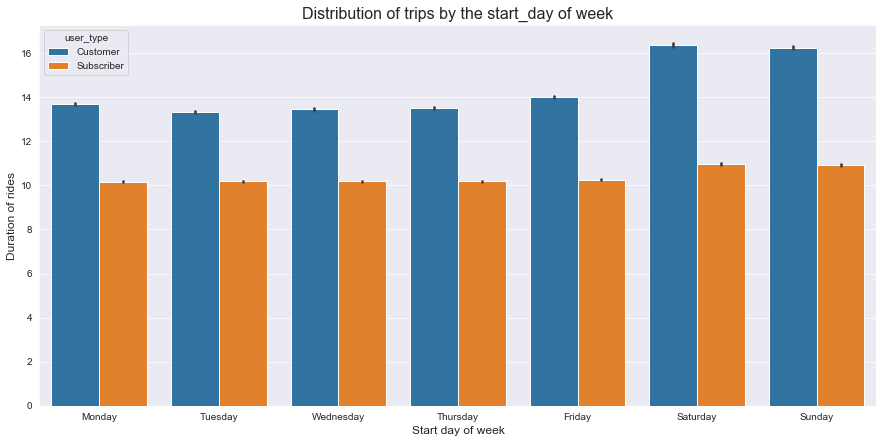

In [66]:
plt.figure(figsize=(15,7))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
baywheels_new['start_day_of_week'] = baywheels_new['start_day_of_week'].astype(weekdaycat)

sb.barplot(data=baywheels_new, x='start_day_of_week', y='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);

In [67]:
baywheels_new.groupby(['start_day_of_week', 'user_type']) ['duration_min'].mean()

start_day_of_week  user_type 
Monday             Customer      13.700941
                   Subscriber    10.177316
Tuesday            Customer      13.336979
                   Subscriber    10.181139
Wednesday          Customer      13.457134
                   Subscriber    10.179134
Thursday           Customer      13.522606
                   Subscriber    10.185636
Friday             Customer      14.009094
                   Subscriber    10.266373
Saturday           Customer      16.370093
                   Subscriber    10.981820
Sunday             Customer      16.254552
                   Subscriber    10.920821
Name: duration_min, dtype: float64

- The clustered barchart informs that trip duration is fairly constant for Subscribers over the week. It is significantly higher for Customers at the weekend.

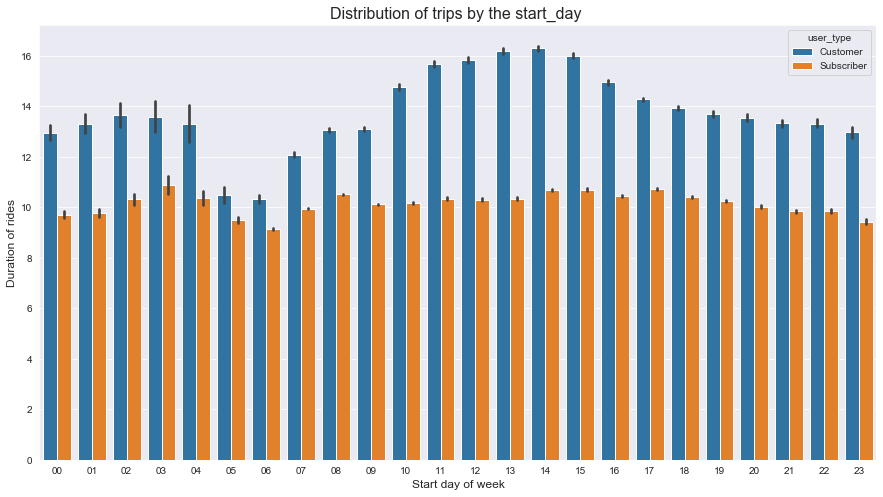

In [68]:
plt.figure(figsize=(15, 8))
base_color = sb.color_palette()[1]
sb.barplot(data=baywheels_new, x='start_hour_of_day', y='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day ", fontsize=16);


- The trip duration has a dip between 5 and 9 o'clock, for both user groups. And is further quite stable.

Next we analyse how the pattern of the hourly usage within a week for Customers and Subscribers

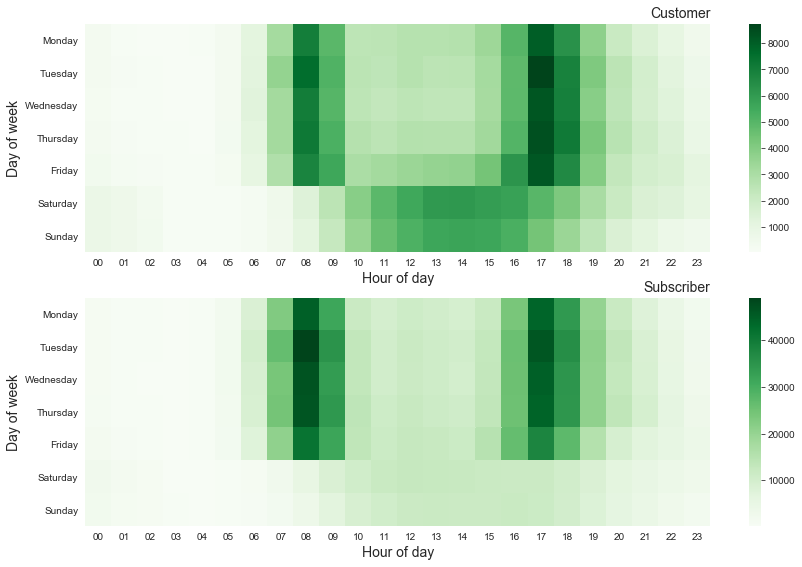

In [69]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = baywheels_new.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Greens");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = baywheels_new.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Greens");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)

- Interestingly, Customers tend to use the bike services mostly at weekdays from 07:00 to 09:00 and 16:00 to 19:00 with heavy traffic at 08.00 and 17:00. This result may indicate that these customers maybe people who have to commute to work or to school. On the other hand, weekend (Saturday/Sunday) their usage turns to concentrate between 10:00 and 16:00 hours. For Subscribers however, have trips only on weekdays between 05:00 and 09:00 as well as 15:00 to 19:00 hours with heavy traffic at 08:00 and 17:00 hours accordingly.

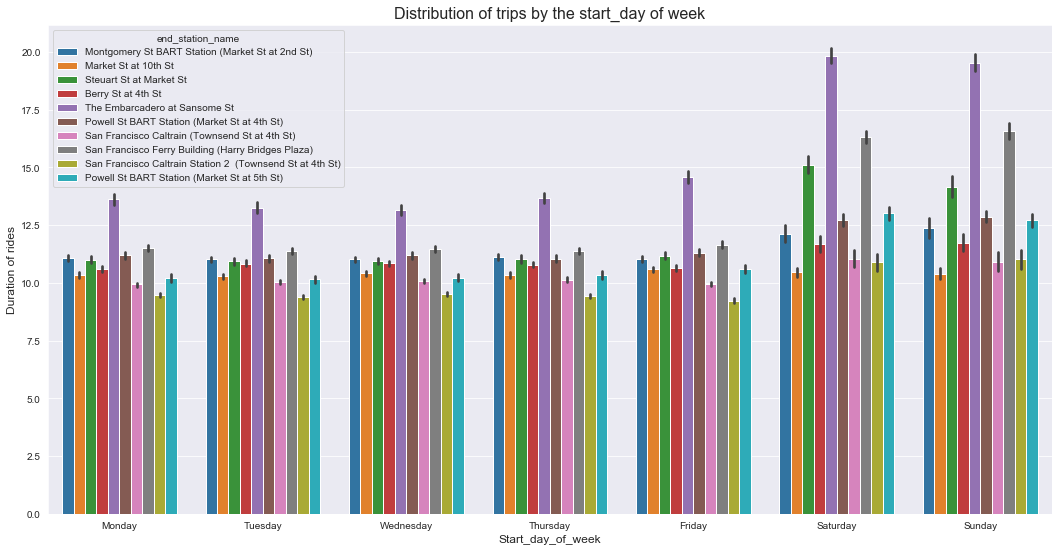

In [70]:
plt.figure(figsize=(18,9))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
popular_destinations_df['start_day_of_week'] = popular_destinations_df['start_day_of_week'].astype(weekdaycat)

sb.barplot(data=popular_destinations_df, x='start_day_of_week', y='duration_min', hue='end_station_name')
plt.xlabel('Start_day_of_week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);

The plot indicates that trip_duration is about the same except for the destination The Embarcadero at Sansome St (about 30-40% higher). This probably may be due to conditions in the surrounding area (SF Bay leisure areas) and longer corresponding trip distances.

And here we see that the long trip duration to The Embarcadero at Sansome St might be caused by the user_type 'Customers' which has an outlying trip duration towards that location.

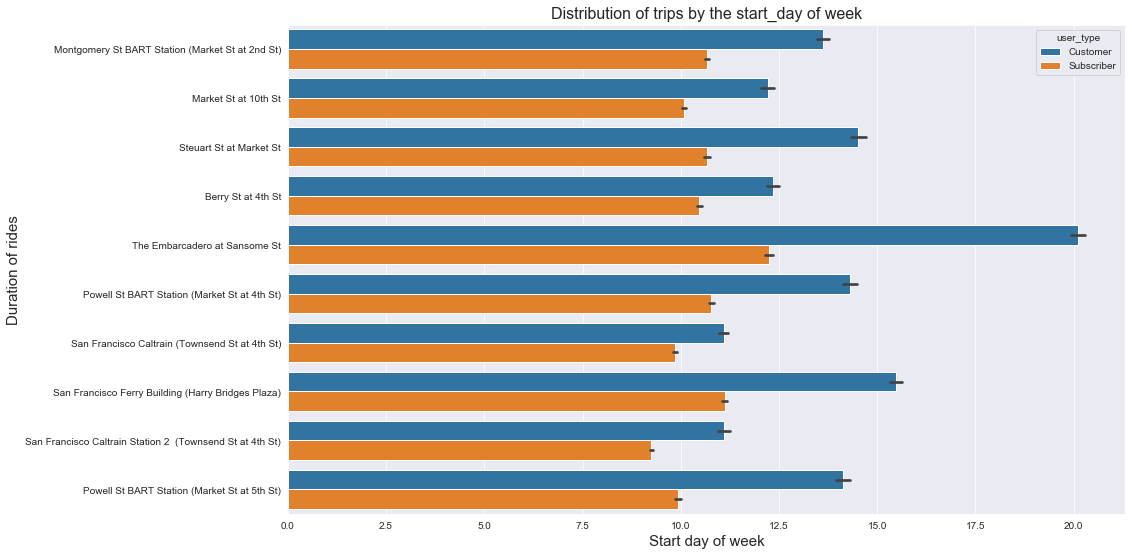

In [71]:
plt.figure(figsize=(15,9))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
popular_destinations_df['start_day_of_week'] = popular_destinations_df['start_day_of_week'].astype(weekdaycat)

sb.barplot(data=popular_destinations_df, y='end_station_name', x='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=15)
plt.ylabel('Duration of rides', fontsize=15)
plt.title("Distribution of trips by the start_day of week", fontsize=16);

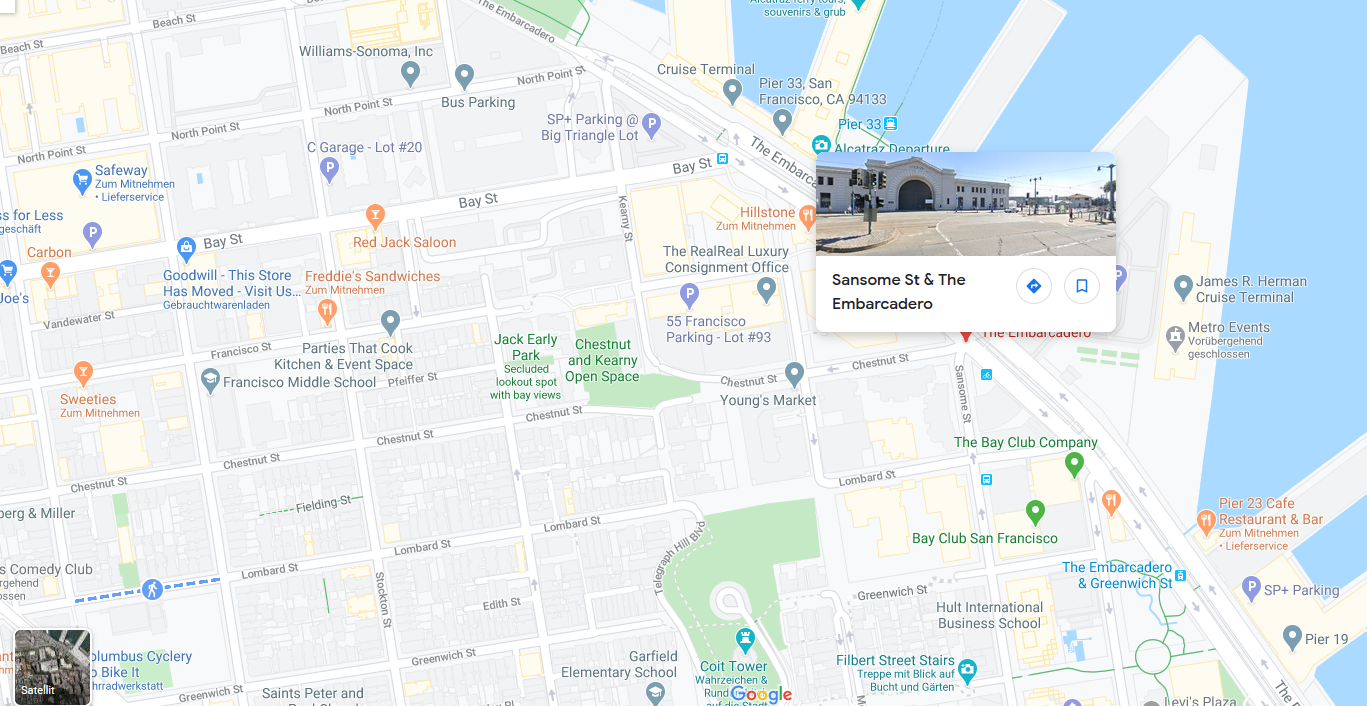

In [72]:
from IPython.display import Image
Image(filename='embarcadero.png')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- We have seen from the analysis that customers are  not only recreational users, the hire bike during the weekdays as well. Customers turn to hire bikes during weekdays, while Subscribers mainly hire bikes especially during the weekdays.

- Customers have significantly higher trip duration than Subscribers. They have on average 5 minutes more bike trips than that of Subscribers.

- The last multivariate explorations helped in throwing more light information patterns about bike usage on hourly level over the whole course of a week, and the differences between Customers and Subcribers. Suprisingly, it reveals that Customers turn not only to be recreational users but also hire bikes during the weekdays as well.

- For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and day of the week. Interesting, Customers tend to use the bike services mostly at weekdays from 07:00 to 09:00 and 16:00 to 19:00 with heavy traffic at 08.00 and 17:00 hours GMT, and also at the weekends (Saturday/Sunday) from 10:00 to 16:00, while Subscribers have trips from Monday to Friday between 07:00 and 09:00 as well as 15:00 to 19:00 hours with heavy traffic at 08:00 and 17:00 hours accordingly. Thus we see that the time heavy traffic of the heavy traffic is similar to both user groups.


### Were there any interesting or surprising interactions between features?

- The trip duration has a dip between 6 and 9 o'clock, for both user_types.

- Also location of end destination station matters as variable for predicting bike usage; the destination The Embarcadero at Sansome St has the highest trip duration (about 30-40% higher) compared with other destinations. There might probably be relation with that the station's location closer to a great tourist/recreation area which makes it a more interesting place to visit.



<a id='conclusion'></a>
## 6. conclusion

In this project focus centered on acquiring and developing the techniques for data visualization within data analysis process.

To this end, I used 2.506.983 bike trips of the 2019 baywheels dataset. After data collection, cleaning and construction of new variables, I plot visualisations of the given data starting with univariate and moving finally multivariate analysis. 

There are two user groups in the dataset with Customers and Subscribers with Subscribers amounting to 80% of the dataset. Some interesting findings i got from bike trip distribution has right skewed distribution and distribution of trip duration after outliers has been removed using the Z-score of 5 standard deviation is bimodal. 

I found out that Customers on average have 5 minutes longer trip durations as Subscribers. Furthermore Customers turn to be active at weekdays and on weekends as well. While Subscribers are only active on weekdays. During weekdays Customers and Subscriber to turn to have the same trip distribution within the rush hours with high traffic for both groups being 8:00 and 17:00 hours GMT. At the weekends though, Subscribers are inactive. 

Furthermore, i noticed that the variable the end station also plays a vital part in the trip duration. Using the ten most top end stations The Embarcadero at Sansome St has longest trip duration and this observed in Customers user-type, who have an outlying trip duration towards this location.


<a id='resources'></a>
### 7. Resources

- https://community.dataquest.io/t/jupyter-notebook-hyperlink/45370/2
- https://honingds.com/blog/pandas-read_csv/
- https://stackoverflow.com/questions/61701989/reordering-heatmap-rows-in-python-using-a-custom-categorical-index-order